# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [1]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
  0% 0.00/5.21M [00:00<?, ?B/s]
100% 5.21M/5.21M [00:00<00:00, 155MB/s]
Archive:  parkinglot-occupation.zip
  inflating: ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_04c6ff9e977d4f59bbf963bfb97f6872_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_0571fcbaa9b94ddfaf5c65edad33e59e_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_064a5abf3c7d47f9942f77da2a2af7e7_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_066690ec6e534d9fbe6be7f9acffb48d_empty.jpg  
  inflating: ParkingLot_Occupation/

## Import Libraries

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout,Rescaling
import tensorflow as tf

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import numpy as np

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your dataset
train_dir = '/content/ParkingLot_Occupation/train'
test_dir = '/content/ParkingLot_Occupation/test'

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.15)


test_datagen = ImageDataGenerator(rescale=1./255)




In [32]:
from PIL import Image

img = Image.open('/content/ParkingLot_Occupation/test/empty/roi_38f1d5db02f04e7d9b78236269c788ef_empty.jpg')
img = img.resize((64, 64))
img_ar = np.array(img)
img_ar.shape #take a look at the image to know the dimension


(64, 64, 3)

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [19]:
# Training 85%
train = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',  #empty or occupied
    subset='training',
    seed=42
)

# Validation 15%
val = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=42
)

# Testing 100%
test = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    seed=42
)

Found 1175 images belonging to 2 classes.
Found 207 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


In [23]:
#count the class to see if its balanced or not
label_counts = np.bincount(train.classes)
print(label_counts) #  as we can see classes are almost balanced
#Therefore, we'll use accuracy as a metric

[618 557]


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [70]:
#model arch

model = Sequential([

    #Input layer
    Conv2D(8,(3,3),activation='relu',input_shape=(64,64,3)),
    MaxPooling2D((2,2)),

    #Hidden layers
    Conv2D(16,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(units=8, activation='relu'),
    Dense(units=16, activation='relu'),

    #Output layer
    Dense(units=1, activation='sigmoid')
])



## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [71]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['acc'])

from keras.callbacks import EarlyStopping
early_stop= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

history = model.fit(train, epochs=20,validation_data= val)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - acc: 0.4817 - loss: 0.6760 - val_acc: 0.5217 - val_loss: 0.5458
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - acc: 0.6971 - loss: 0.4958 - val_acc: 0.9275 - val_loss: 0.3891
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - acc: 0.9433 - loss: 0.3604 - val_acc: 0.9372 - val_loss: 0.3319
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - acc: 0.9539 - loss: 0.3014 - val_acc: 0.9324 - val_loss: 0.1779
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - acc: 0.9440 - loss: 0.1341 - val_acc: 0.9807 - val_loss: 0.0770
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - acc: 0.9660 - loss: 0.1172 - val_acc: 0.9614 - val_loss: 0.0947
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - acc: 0.9770 - loss: 0.0720 - val_acc: 0.9710 - val_loss: 0.0762
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - acc: 0.9772 - loss: 0.0554 - val_acc: 0.9758 - val_loss: 0.0627
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - acc: 0.97

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [72]:
 model.evaluate(test)  #pretty good

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 0.9938 - loss: 0.0176


[0.023729154840111732, 0.9912790656089783]

## Make Predictions
Use the trained model to make predictions on new or unseen parkinglot images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [39]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
parkinglot-occupation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  parkinglot-occupation.zip
replace ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [73]:
y_pred= model.predict(test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [74]:
y_pred = y_pred>0.5

In [75]:
from sklearn.metrics import accuracy_score

print('accuracy:',accuracy_score(y_pred,test.classes)*100)

accuracy: 47.383720930232556


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

<Axes: >

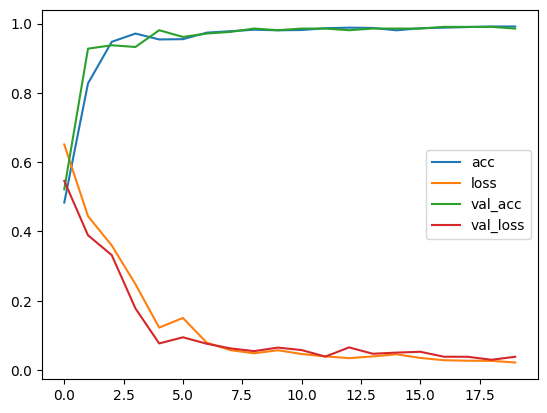

In [76]:
import pandas as pd

pd.DataFrame(history.history).plot() #note that in training-validation process the model gives a really good results
                                    #as you can see from the plot val_acc is really good and there is no overfitting
                                    #but in the testing it gives a bad result 50% acc which is bad maybe the reason
                                    #is that testing has new data the model has never seen.
                                    #or because the data is too small

## Save the Model
Save the trained CNN model for submission.

In [56]:
model.save('Week5Task2.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying parkinglot?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1. For the preprocessing i did normalize the pixels by /255 to put it in range [0,1], another preprocessing i did was to resize the image to 64x64, making the image smaller saves computing power.

2. the layers are hyperparameters you have to try multiple arch, for me at first i tried conv2d(128(3,3)),conv2d(256(3,3))
Dense(512),Dense(256) both relu which gave me a very bad over fitting result after trying diffrent archs i simplified the arch to this one.

3. for the activation function: hidden layer was all relu because relu produce positive number which is what we need for the pixels then for the output layer i used sigmoid to classifiy my input whether its 0 or 1 => empty or occupied.

4. for the training process: first i created a batch of 32 to process or data at once then used 20 epochs to avoid overfitting with callbacks.

5. About loss function and metric: i found that the data is binary classified and balanced ===> so i choose to use binary_crossentropy for the loss and accuracy for metric.

6. didn't need a regularization techniuqe since the model was performing great on the validation data.

7. Evaluation: my model performed kinda bad on the testing set with 50% accuracy, i think there is 2 main reasons for that  
  1- Dataset was small.
  2- maybe test set has unfamiliar data.
8. on the visualization side the plot was telling me that the model is performing really great on the validation set as you can see val_acc and train_acc were close togther  also the loss was low and no overfitting.

9. i think the model was performing good but if there was an overfitting we could use any regularization techniuqe like dropout, L1, L2, callbacks...etc.


